# SIT744 Assignment 2 (T2 2025)

Due: Week 7 Monday 8:00 pm (AEST)

This is an individual assignment. It contributes 30% to your final mark. Read the assignment instructions carefully.

## What to submit
By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin:

- **[YourID]_[UnitCode]_assignment2_solution.ipynb**: This is your Python notebook solution source file.
- **[YourID]_[UnitCode]_assignment2_output.pdf**: This is the output of your Python notebook solution exported in PDF format. (You may use [nbconvert](https://github.com/jupyter/nbconvert).)
- (HD Task only) A short (less than 5 minutes) screencast explaining your work (including study design, implementation, and main conclusions).
- Extra files required to complete your assignment, if any (e.g., images used in your answers).

For example, if your student ID is: 123456, and you are a SIT744 student, you will then need to submit the following files:

- 123456_SIT744_assignment2_solution.ipynb
- 123456_SIT744_assignment2_output.pdf

Please keep your answers short and to the point. Clean up your code outputs to reduce unnecessary information (e.g., excessively long training logs).



## Assignment objective

This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most P-level tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.


This assignment consists of four sets of tasks with progressive level of challenges.

- Set 1 (P Tasks)
- Set 2 (C Tasks)
- Set 3 (D Tasks)
- Set 4 (HD Tasks)

Set 1 is labeled as P tasks because these demonstrate the minimum requirements of the unit. Concentrate on the P tasks first as these are the foundation for all the rest. As you move through sets 2, 3 and 4, the tasks become more challenging, with each allowing you to obtain the marks required to achieve the next achievement level (C, D, and HD respectively).

## Marking criteria
Indicative weights of various tasks are provided below, but your submission will be marked by the following criteria, adjusting for the overall quality.

### P-level expectation
- Showing good effort through completed tasks.
- Applying deep learning theory to design suitable deep learning solutions for the tasks.
- Demonstrating at least ‘Analysis’ level (Level 4) thinking in Bloom’s Taxonomy. This means you should not only implement the tasks but also examine, compare, and interpret results, explaining why certain decisions were made and what patterns or insights are revealed by your solution.

### C-level expectation
- Showing attention to detail through a good quality assignment report.

### D-level expectation
- Demonstrating creativity and resourcefulness in providing unique individual solutions.
- Critically evaluating and reflecting on the pros and cons of various design decisions.

### HD-level expectation
- Extending classroom learning to research and tackle previously unexplored theoretical questions or novel applications

**(Warning: Highly similar solutions will be investigated for collusion.)**


Run the following code before you start.

In [72]:
# import getpass
# import datetime
# import socket

# def generate_author_claim():
#     # Get current user
#     user = getpass.getuser()

#     # Get current timestamp
#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#     # Get current IP address
#     ip_address = socket.gethostbyname(socket.gethostname())

#     # Enter your name
#     name = input("Enter your full name: ")

#     # Enter your email address
#     email = input("Enter your email address: ")

#     # Enter your student ID
#     student_id = input("Enter your student ID: ")

#     # Generate author claim string
#     author_claim = f"Code authored by {user} ({name} {student_id} {email}) on {timestamp}  from IP address {ip_address}"

#     return author_claim

# # Generate the author claim string
# author_claim = generate_author_claim()

# # Print the author claim string
# print(author_claim)


### Import Modules

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from torch.utils.tensorboard import SummaryWriter
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


## **Set 1 (P Tasks) Construct a forward neural network**
*(weight ~60%)*

With this set of tasks, you are going to build a neural network for a classification task. You will train the model on a MIT-BIH Arrhythmia dataset that can be downloaded from the unit site. you can review [the paper](https://www.researchgate.net/publication/352809452_Harnessing_Artificial_Intelligence_for_Secure_ECG_Analytics_at_the_Edge_for_Cardiac_Arrhythmia_Classification) to understand this dataset better. 

### Task 1.1 Understanding the data

*(weight ~20%)*

---
### **Need Review**? What does the patterns mean? 
**1. Describe the dataset and target labels for the prediction task.** 
  * Examine training examples from each target class and **explain** any patterns you observe.
  * **Analyse** how these patterns might impact model training or the difficulty of classification.
---

**Answer**

In [74]:
data_frame = pd.read_csv('data.csv')

type = data_frame['type'].unique()
patient = data_frame['record'].unique()
print(f'number of class = {type}')
for i in type:
    print(f'class {i} has {(data_frame['type'] == i).sum()} rows')
print('-----------------------')
print(f'number of patient = {len(patient)}')

number of class = ['N' 'Q' 'SVEB' 'VEB' 'F']
class N has 90083 rows
class Q has 15 rows
class SVEB has 2779 rows
class VEB has 7009 rows
class F has 803 rows
-----------------------
number of patient = 44


**Describe the dataset:**
- This is ECG data used to classify the heartbeat disease. The dataset includes 4 classes, they are very imbalance when the largest target (N) has 90083 samples and smallest target (Q) has only 15 samples

**The patterns and impact**
- The Q class has very few examples, which makes it difficult for the model to learn meaningful patterns. Overall, the dataset is highly imbalanced, which may bias the model towards predicting the majority class (N).

---

**2. Describe the data types of each feature. What preprocessing steps are required? Why?**



**Answer**

<u>Describe the data types of each feature.</u>
- This code is used to check data types of each feature

In [75]:
data_type_frame = {}
for feature, dataType in data_frame.dtypes.items():
    data_type_frame[feature] = str(dataType)
data_type_frame = pd.DataFrame([data_type_frame])
data_type_frame.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,int64,object,int64,float64,float64,float64,float64,float64,float64,int64,...,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64


As we can see in this dataset, we have only one categorical feature (type) and remain features are numeric

<u>What preprocessing steps are required? Why?</u>

1. **Label Encoding**: 
   - Convert categorical labels ('N' 'Q' 'SVEB' 'VEB' 'F') to numeric format (0, 1, 2, 3) for neural network training.
   - reason: because neural network and ML work well with numeric

2. **Feature Normalization/Standardization**: 
   - Reason: to ensure all features contribute equally, prevents features with larger magnitudes from dominating the learning process

3. **Handle Class Imbalance**:
   - As we can see above our data is extreme imbalance (N: 90,083 vs Q: 15 samples). In the paper they use up-sample to balance the data. However we can use SMOTE
   - Without balance data, our model will bias toward majority class 'N'

4. **Feature Selection**:
   - Remove features like patient IDs because it is non-informative for classify

--- 

**3. Prepare the data for learning a neural network, including preprocessing, creating training, validation, and test datasets. How many training examples and how many test examples are you using?**

**Answer**

<u>Process Data</u>

In [76]:
# features selection (remove the patient ID column)
data_frame_processed = data_frame.drop(['record'], axis=1)
# label categorical data
data_frame_processed['type'] = LabelEncoder().fit_transform(data_frame_processed['type'])
# normalize data: use Standard Scaler
scaler = StandardScaler()
feature_x_raw = data_frame_processed.drop(['type'], axis=1)
feature_x_scaled = pd.DataFrame(scaler.fit_transform(feature_x_raw), columns= feature_x_raw.columns)
target_y = data_frame_processed['type']

<u>Creating training, validation, and test datasets</u>

In [77]:
x_all = feature_x_scaled.values.astype(np.float32)  # original scaled 
y_all = target_y.values.astype(np.int64)
x_train_raw, x_temp, y_train_raw, y_temp = train_test_split(x_all, y_all, test_size=0.2, random_state=42, stratify=y_all) # float64 is highest type in the original features
x_val, x_test, y_val, y_test = train_test_split( x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) #because in the original data, the target column has type int64
# apply SMOTE only for training set, we should not apply SMOTE for test data
x_train, y_train = SMOTE(random_state=42).fit_resample(x_train_raw, y_train_raw)
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

train_ds = CustomDataset(x_train, y_train)
val_ds   = CustomDataset(x_val, y_val)
test_ds  = CustomDataset(x_test, y_test)
batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)
print(f"Train (after SMOTE): {len(train_ds)}, Val: {len(val_ds)}, Test: {len(test_ds)}")

Train (after SMOTE): 360330, Val: 10069, Test: 10069


---

### Task 1.2 Setting up a model for training

(weight ~ 20%)

Construct a deep feedforward neural network. Justify your model design decisions. Plot the model structure using `torchsummary` or similar tools.



**Answer**

In [78]:
class MyNet(nn.Module):
    def __init__(self, size_of_input, number_class):
        super(MyNet, self).__init__()
        self.unit_1 = nn.Linear(size_of_input, 256)
        self.unit_2 = nn.Linear(256, 128)
        self.unit_3 = nn.Linear(128, 64)
        self.unit_4 = nn.Linear(64, number_class)
    
    def forward(self, x):
        x = F.tanh(self.unit_1(x))
        x = F.tanh(self.unit_2(x))
        x = F.tanh(self.unit_3(x))
        x = F.softmax(self.unit_4(x))
        return x

Construct a deep feedforward neural network. In other words, you can use **only fully connected (dense) layers**. You need to decide and report the following configurations:

- Output layer:
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
    - Do you need to reshape the input? Why?

Justify your model design decisions.

Plot the model structure using `torchsummary` or similar tools.



**Answer**

---

### Task 1.3 Fitting the model

(weight ~ 20%)


Decide and report the following settings:

- The loss function
- The metrics for model evaluation (which may be different from the loss function)

Explain their roles in model fitting.

Decide the optimiser that you will use. Also report the following settings:

1. The training batch size
2. The number of training epochs
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Justify your decisions.

Now fit the model. Show how the training loss and the evaluation metric change. How did you decide when to stop training?




<u> Answer </u>

/var/folders/7y/tb8vlfv937523rgqdlf0zjy40000gn/T/ipykernel_86671/1017195248.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.unit_4(x))


Epoch 1/10: Train Loss: 0.9907, Train Acc: 91.45%, Validate Loss: 1.0000, Validate Acc: 90.47%
Epoch 2/10: Train Loss: 0.9742, Train Acc: 93.06%, Validate Loss: 1.0258, Validate Acc: 87.82%
Epoch 3/10: Train Loss: 0.9737, Train Acc: 93.09%, Validate Loss: 0.9938, Validate Acc: 91.07%
Epoch 4/10: Train Loss: 0.9736, Train Acc: 93.09%, Validate Loss: 1.0057, Validate Acc: 89.82%
Epoch 5/10: Train Loss: 0.9746, Train Acc: 92.98%, Validate Loss: 1.0105, Validate Acc: 89.42%
Epoch 6/10: Train Loss: 0.9762, Train Acc: 92.84%, Validate Loss: 1.0146, Validate Acc: 88.93%
Epoch 7/10: Train Loss: 0.9771, Train Acc: 92.75%, Validate Loss: 1.0265, Validate Acc: 87.84%
Epoch 8/10: Train Loss: 0.9771, Train Acc: 92.75%, Validate Loss: 0.9987, Validate Acc: 90.63%
Epoch 9/10: Train Loss: 0.9791, Train Acc: 92.53%, Validate Loss: 1.0077, Validate Acc: 89.62%
Epoch 10/10: Train Loss: 0.9790, Train Acc: 92.55%, Validate Loss: 1.0048, Validate Acc: 89.90%


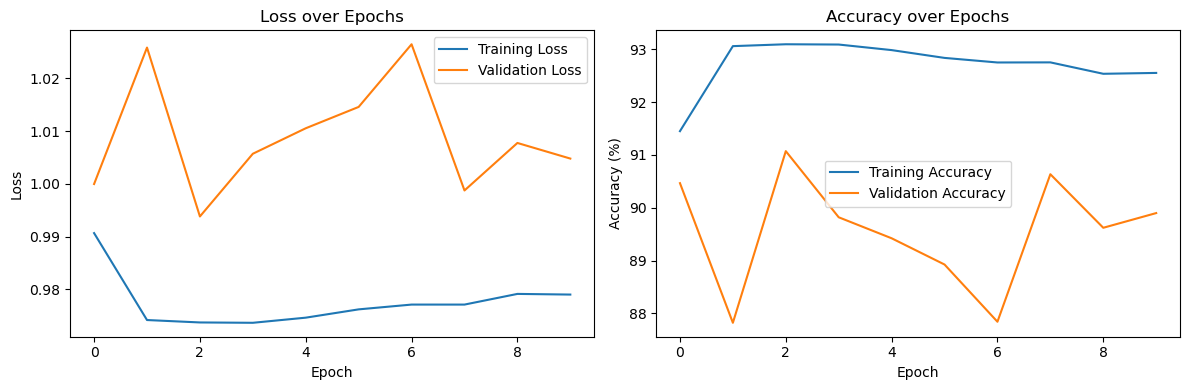

Test Loss: 1.0101, Test Accuracy: 89.39%


In [80]:
class TrainModel():
    def __init__(self, neural_model, device, criterion, optimizer):
        self.neural_model = neural_model
        self.criterion = criterion
        self.optimizer = optimizer 
        self.device = device

    def train(self, train_loader):
        self.neural_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for batch_id, (data, target) in enumerate(train_loader):
            data, target = data.to(self.device), target.to(self.device)
            
            self.optimizer.zero_grad() #clear previous gradient
            output = self.neural_model(data)
            loss = self.criterion(output, target) #if confidence is high and prediction is wrong -> high penalty
            loss.backward() 
            self.optimizer.step() #update weight
            
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        return epoch_loss, epoch_acc

    def validate(self, val_loader):
        self.neural_model.eval() # switch to evaluation mode (turn OFF the dropout layers ...)
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(self.device), target.to(self.device)
                output = self.neural_model(data)
                val_loss += self.criterion(output, target).item()
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total
        return val_loss, val_acc
    
    def train_epoch(self, num_epochs):
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []
        for epoch in range(num_epochs):
            train_loss, train_acc = self.train(train_loader)
            val_loss, val_acc = self.validate(val_loader)
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Validate Loss: {val_loss:.4f}, Validate Acc: {val_acc:.2f}%')
        
        return train_losses, train_accuracies, val_losses, val_accuracies


model = MyNet(x_train.shape[1], len(np.unique(y_train)))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
train_model = TrainModel(model, device, nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=0.01))
train_losses, train_accuracies, val_losses, val_accuracies = train_model.train_epoch(num_epochs= 10)

# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Final test evaluation
test_loss, test_acc = train_model.validate(test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

# ...existing code...

---

## **Set 2 (C Tasks) Improve the model**

(weight ~ 10%)

### Task 2.1 Check the training using visualisation

Visualise the training process (e.g., using TensorBoard). Show screenshots of visualisation.

Do you see overfitting or underfitting? Why?
If you see overfitting, at which epoch did it happen?


### Task 2.2 Apply regularisation

Improve the training process by applying regularisation. Below are some options:

1.   Dropout
2.   Batch normalisation

Compare the effect of different regularisation techniques on model training. You may also try other techniques for improving training such as learning rate scheduling.



## **Set 3 (D Tasks) Analyse the learned representations**

(weight ~ 10%)

In this task, you will explore the visualization of embeddings at different layers of your trained neural network and analyse how they evolve using **Uniform Manifold Approximation and Projection** ([UMAP](https://github.com/lmcinnes/umap)). Below are detailed steps you can follow.

1. Select a subset of your training data containing both classes.
2. Extract the embeddings from each layer of the neural network model for the dataset.
3. Apply UMAP to visualise the embeddings from each layer in a 2-dimensional space, highlighting different classes with distinct colours or markers. Include appropriate labels and legends in your plots.
4. Analyse and discuss the evolution of the embeddings across layers. Answer the following questions in your analysis:

  - Do the embeddings show a clear separation between classes at any specific layer?
  - How do the separation and clustering of classes change as you move across layers?
  - Are there any notable changes in the distribution or structure of the embeddings?
  - Are there any layers where the embeddings become less discriminative or more entangled?

5. Summarize your findings and provide insights into the behaviour of the neural network's representations at different layers. Discuss the implications of the observed changes in the embeddings for the network's ability to capture class-specific information and make predictions.



## **Set 4 (HD Tasks) Investigating Neural Collapse in Deep Learning**

*(weight ~20%)*

In this research task, you will explore the phenomenon of "neural collapse" in deep learning models. Additionally, you must identify meaningful research gaps or failure cases that arise from the literature or your own experiments.


### Task 4.1 Examine layer rotation with Layca

1. Reproduce experiments described in the paper [Layer rotation: a surprisingly powerful indicator of generalization in deep networks?](https://arxiv.org/abs/1806.01603),  Compare the results you obtained with the ones in the paper. Do you identify any discrepancies?

2. What connections do you discover between the paper and what you have learnt in the unit?

### Task 4.2 Design and Develop Your Own ML Solution
1. Design and develop your own deep learning solution using CIFAR dataset. The proposed solution must be substantially different from the approaches presented in the article. However, this does not mean you are required to choose a new ML algorithm. You can develop a novel solution by changing the feature
selection approach, using different preprocessing techniques, exploring alternative model combinations, or restructuring the training pipeline. The goal is to propose a system that is meaningfully distinct from the authors' method.
Your technical report must include:
* A clear motivation for the proposed solution
* A description of how your method differs from the article
* A well-structured experimental protocol
* Evaluation using Accuracy, Precision, Recall, F1 Score, and AUC.

### Deliverables for HD Tasks

* Written submission (Max 4 pages): Summarize your approach to reproducing the experiments, key findings, and critical observations. Clearly articulate the research gaps or failure cases you identified.
* Link to reproducible code
* Short video presentation (Max 5 minutes): Highlight your main conclusions about neural collapse.
Discuss the most pressing research gaps or failure cases and how addressing them could push the field forward.

---

### End of Assignment 2

---

### need check

validation set

drop out

Batch normal

Weight decay

tensor board 

**show that augmentation can advoid overfiting**